### Описание проекта

*Аналитика крупного интернет-магазина.*

#### ЦЕЛЬ: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результат.

## **Часть 1. Приоритизация гипотез.**

In [1]:
# импортируем библеотку pandas и библиотки для построения графиков,  
# высокоуровневых математический функций, вычисления факториала 
# и для задания распределения по мат. ожиданию
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import pandas_profiling
from math import factorial
from scipy import stats as st
import datetime as dt

# задействуем фичи, от ошибок при повторном использовании одного и того же df
# и для отображения трёх символов после запятой для всех значений с плавающей запятой
# малые финансовые переменные любят 3 значения после запятой 
# расширим колонки для полной читаемости текста в таблицах
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', -1)

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
# делаем загрузку с разных путей в зависимости от того, где запущена тетрадка - локально или на сервере ЯП
root_local = 'C:/Users/PC/проекты Яндекс/Датасеты/' #путь к данным при локальном запуске
root_yp = '/datasets/' #путь к данным при запуске на сервере ЯП
username = 'PC'
try:
    username = os.environ["USERNAME"]
except:
    pass
if(username == 'PC'): # локально
    root_path = root_local
else: # в тренажере
    root_path = root_yp
visitors = pd.read_csv(root_path + 'visitors.csv')
orders = pd.read_csv(root_path + 'orders.csv')
hypothesis = pd.read_csv(root_path + 'hypothesis.csv')

In [3]:
# изучим данные
all_df = [visitors, orders, hypothesis]
for df in all_df:
    df.copy()
    display(df.info())
    display(df.head())
    display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


In [4]:
# переведём тип колонок с датой в каждой датасете к дататайму
for df in all_df:
    for column in df.columns:
        if 'date' in column:
             df[column] = pd.to_datetime(df[column])   

In [5]:
# переименуем наименования столбцов более понятные 
for df in all_df:   
    display(df.columns)

Index(['date', 'group', 'visitors'], dtype='object')

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

In [6]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
#hypothesis = hypothesis.rename(columns={'Hypothesis':'hypothesis', 
#                                        'Reach':'reach', 'Impact':'impact', 
#                                        'Confidence':'confidence', 'Efforts':'efforts'})
hypothesis.columns = map(str.lower, hypothesis.columns)

In [7]:
# Проверим дубликаты
for df in all_df:
    display(df.duplicated().sum())

0

0

0

**Вывод:**
    - пропусков не обнаружено;
    - типы данных и наименование столбцов приведены в порядок;
    - минимальный чек - 50, максимальный - 1 294 500, среднее - 8 300. Что говорит, о том что есть аномальные покупки; 
    - дубликатов не обнаружено.

##  Применим фреймворк ICE и RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
# посчитаем ICE для гипотез (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)  
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [9]:
# посчитаем RICE для гипотез
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Где, 
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

In [10]:
# выведем результаты фреймворка RICE
# hypothesis.style.set_properties(**{'text-align': 'right'})
hypothesis[['hypothesis', 'RICE', 'reach', 'impact', 'confidence', 'efforts']].\
sort_values(by=['RICE'], ascending=False)

,hypothesis,RICE,reach,impact,confidence,efforts
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,10,7,8,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00,8,3,7,3
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00,3,10,8,6
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00,5,3,8,3
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,1,9,9,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00,8,3,3,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,2,5,4,10
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00,3,2,2,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,3,1,1,1


In [11]:
# выведем результаты фреймворка ICE
hypothesis[['hypothesis', 'ICE', 'reach', 'impact', 'confidence', 'efforts']].\
sort_values(by=['ICE'], ascending=False)

,hypothesis,ICE,reach,impact,confidence,efforts
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,1,9,9,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,3,10,8,6
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,10,7,8,5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,5,3,8,3
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,8,3,7,3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,2,5,4,10
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,3,2,2,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3,1,1,1


**Вывод:**
Самые важные гипотезы:
     - RICE = 112.0 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
     - ICE = 16.2 - Запустить акцию, дающую скидку на товар в день рождения
 
RICE - более привлекательный и гибкий фреймворк т.к. в нём учитывается охват изменения. 

Протестируем гипотезу №7 c максимальным охватом.

##  **Часть 2. Анализ A/B-теста**

##     Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.\
apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
      agg({'date' : 'max',
           'group' : 'max',
           'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.\
apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].\
      agg({'date' : 'max', 
           'group' : 'max',
           'transaction_id' : 'nunique', 
           'visitor_id' : 'nunique',
           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

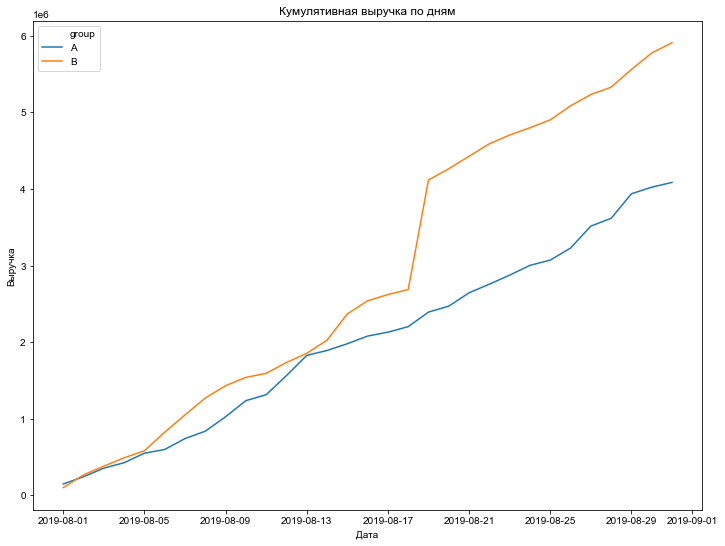

In [14]:
# Строим график выручки группы А и B
plt.figure(figsize=(12,9))
sns.lineplot(data = cumulativeData, hue='group', x = 'date', y = 'revenue')
sns.set_style("darkgrid")
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням');

**Вывод:**

Выручка почти равномерно увеличивается в течение всего теста. Не плохо!
Но графики выручки обеих групп в нескольких точках резко растут. Это может показывать всплески числа заказов, либо о появлении очень дорогих заказов в выборке.

##     Построим график кумулятивного среднего чека по группам. 

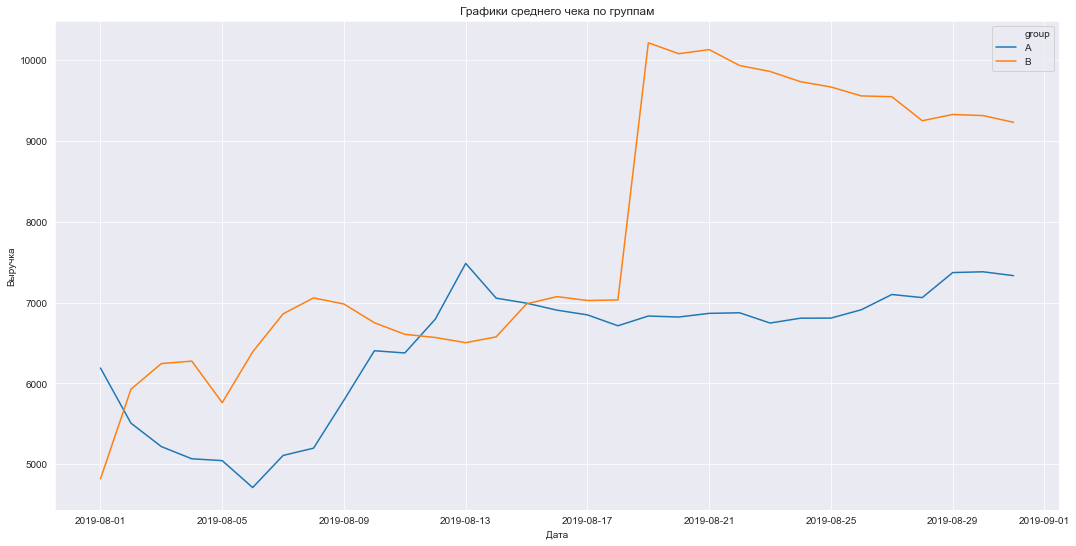

In [15]:
# график среднего чека по группам  А и B
plt.figure(figsize=(18,9))
sns.lineplot(data = cumulativeData, hue='group', x = 'date', y = cumulativeData['revenue']/cumulativeData['orders'])
sns.set_style("darkgrid")
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Графики среднего чека по группам');

**Вывод:**
    
    Средний чек ведёт себя импульсивно для всех групп на протяжение всего теста. Возможн в обе группы попали крупные заказы и мелкие заказы. Явно это видно в группе B, крупный скачёк характеризует выброс. Нужно больше данных, чтобы прийти к реальному среднему чеку.


##     Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

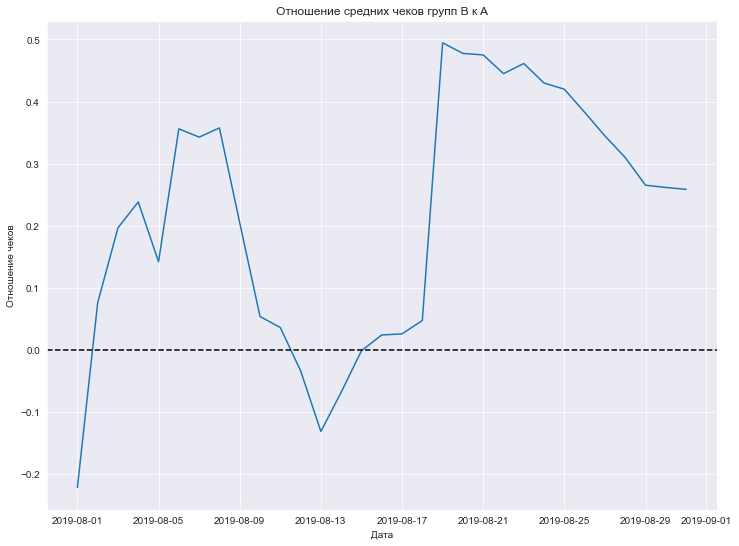

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.\
merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков 
plt.figure(figsize=(12,9))
plt.plot(mergedCumulativeRevenue['date'],
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
        (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение чеков')
plt.title('Отношение средних чеков групп B к A');

**Вывод:**
    В нескольких точках график различия между сегментами резко «скачет». Скорее всего там спрятались крупные заказы и выбросы. 


##     Построим график кумулятивной конверсии по группам. 

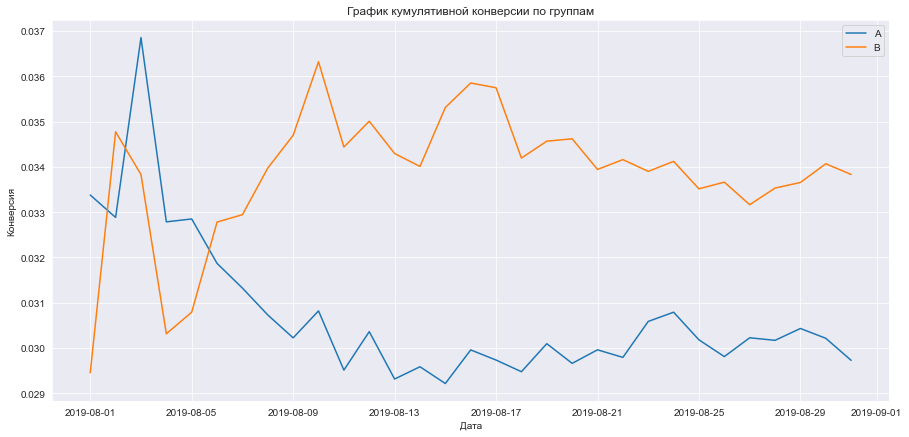

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам');

**Вывод:**
Получился хаотичный график. Группы колебаются и никак не зафиксируются. Видно стабилизацию конверсий групп, но на разных уровнях.

##     Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

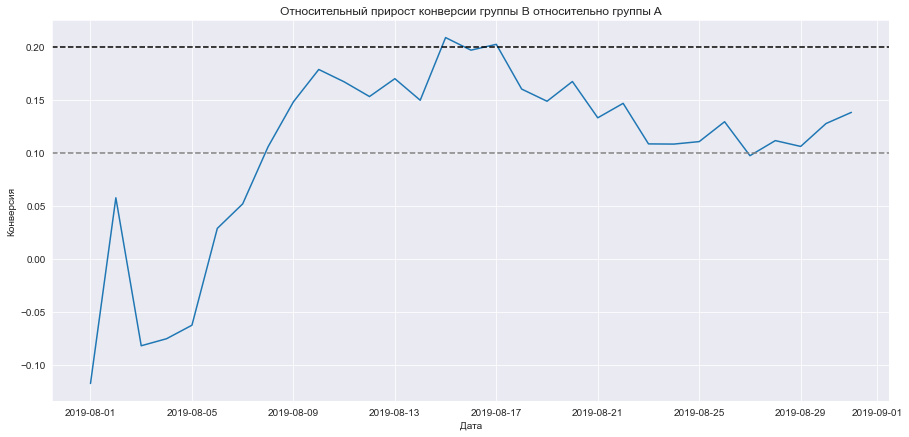

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим графики
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0.2, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Относительный прирост конверсии группы B относительно группы A');

**Вывод:**
В начале обе группы колебаются.  Но далее группа B берёт вверх по конверсии и находится на более приятном уровне чем A.

##     Построим точечный график количества заказов по пользователям. 

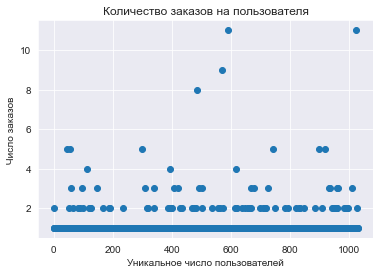

In [19]:
orders_nunique = orders.groupby('visitor_id').agg(orders_nuniq = ('transaction_id','nunique'))
x_orders_nunique = pd.Series(range(0,len(orders_nunique['orders_nuniq'])))
plt.scatter(x_orders_nunique, orders_nunique['orders_nuniq'])
plt.xlabel('Уникальное число пользователей')
plt.ylabel('Число заказов')
plt.title('Количество заказов на пользователя');

**Вывод:**
    Большинство покупателей заказывают 2-4 раза

##     Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [20]:
# %%timeit
np.percentile(orders_nunique['orders_nuniq'], [95, 99])

array([2., 4.])

**Вывод:** Верхний вывод подтверждён! Большинство покупателей заказывают 2-4 раза. 

Примем за границу отсечений аномалей - 2 заказа.

##     Построим точечный график стоимостей заказов. 

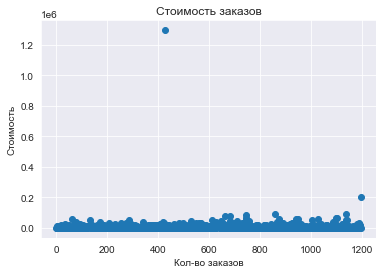

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость')
plt.title('Стоимость заказов');

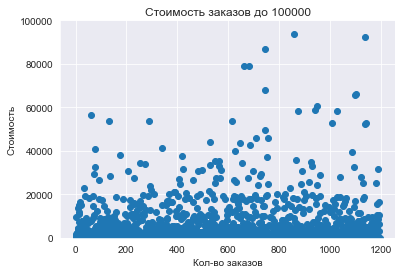

In [22]:
# поставим фильтр по графику
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ylim(0,100000)
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость')
plt.title('Стоимость заказов до 100000');

**Вывод:**
    Есть аномальные значения которые на несколько порядков больше обычных заказов.

##     Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** Не более 5% заказов дороже 28 000 у.е. и не более 1% дороже 58 233.2 у.е.

Примем за границу выбросов - 28000 у.е.

 ##    Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [24]:
# соберем таблицу с данными
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].\
    agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].\
    agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']].\
    groupby('date', as_index=False).\
        agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

df = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Распишем колонки:

- date - дата
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [25]:
# создадим датафреймы для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).\
    agg({'transaction_id' : 'nunique'})

ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).\
    agg({'transaction_id' : 'nunique'})

ordersByUsersB.columns = ['visitor_id', 'orders']

In [26]:
# Создадим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(
                         df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(
                         df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

    
Поскольку распределение выборок не нормальное по числу заказов и среднему чеку для анализа вероятностей будем применять метод который сравнивает не параметры, такие как среднее или медиану, а ранги значений и их сдвиги.


Применим критерий Манна-Уитни вычислим p-value и выведем относительный прирост конверсии группы B

**Сформулируем гипотезы H0 и H1 для анализа конверсии:**

> Нулевая гипотеза H0 - "Конверсия в группе А равна конверсии в группе В"

> Альтернативная гипотеза Н1 - "Конверсия в группе А не равна конверсии в группе В"

**Сформулируем гипотезы H0 и H1 для анализа среднего чека:**

> Нулевая гипотеза H0 - "Средний чек в группе А равен среднему чеку в группе В."

> Альтернативная гипотеза Н1 - "Средний чек в группе А не равен среднему чеку в группе В."


In [27]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Конверсия в группе А не равна конверсии в группе В.\
 Вывод по «сырым» данным в конверсии групп A и B есть о различия")
    
else:
    
    print("Не получилось отвергнуть нулевую гипотезу. Конверсия в группе А равна конверсии в группе В.\
 По «сырым» данным различия в конверсии групп A и B нет")

print("\nОтносительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.008
Отвергаем нулевую гипотезу. Конверсия в группе А не равна конверсии в группе В. Вывод по «сырым» данным в конверсии групп A и B есть о различия

Относительный прирост конверсии группы B: 0.138


**Вывод:**

- По «сырым» данным в конверсии групп A и B есть различия.
- Относительный выйгрыш группы B равен 13.8%.

##     Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [28]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                          orders[orders['group']=='B']['revenue'])

print('p-значение: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средний чек в группе А не равен среднему чеку в группе В.\
 Вывод по «сырым» данным в среднем чеке групп A и B есть различия")
    
else:
    
    print("Не получилось отвергнуть нулевую гипотезу. Средний чек в группе А равен среднему чеку в группе В.\
 По «сырым» данным различия в среднем чеке групп A и B отсутствуют")

print("\nОтносительное различие в среднем чеке между группами: {0:.3f}".
      format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.365
Не получилось отвергнуть нулевую гипотезу. Средний чек в группе А равен среднему чеку в группе В. По «сырым» данным различия в среднем чеке групп A и B отсутствуют

Относительное различие в среднем чеке между группами: 0.259


**Вывод:**
 - По «сырым» данным различия в среднем чеке групп A и B нет. 
 - Средний чек группы B выше на 25,9% среднего чека группы A.

##     Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [29]:
# сделаем срез аномальных заказов по 95 процентилю, который считали ранее
# узнаем сколько пользователей совершили аномальные заказы методом shape()

users_alot_orders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], 
                            ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis = 0)

users_majors = orders[orders['revenue'] > 28000]['visitor_id']
users_abnormal = pd.concat([users_alot_orders, users_majors], axis = 0).drop_duplicates().sort_values()
display(users_abnormal)
print("Кол-во аномальных пользователй", users_abnormal.shape)

1099    148427295 
18      199603092 
928     204675465 
23      237748145 
37      249864742 
          ...     
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, Length: 74, dtype: int64

Кол-во аномальных пользователй (74,)


In [30]:
# подготовим очищенные выборки по срезу выше
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(users_abnormal))]['orders'],
        pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(users_abnormal))]['orders'],
        pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [31]:
# Применим критерий Манна-Уитни вычислим p-value и выведем относительный прирост конверсии группы B (по очищенным данным)
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Конверсия в группе А не равна конверсии в группе В.\
 Вывод по «очищенным» данным в конверсии групп A и B есть различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Конверсия в группе А равна конверсии в группе В.\
 Вывод по «очищенным» данным различия в конверсии групп A и B нет")

print("\nОтносительный прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.007
Отвергаем нулевую гипотезу. Конверсия в группе А не равна конверсии в группе В. Вывод по «очищенным» данным в конверсии групп A и B есть различия

Относительный прирост конверсии группы B: 0.173


**Вывод:**
- По «очищенным» данным в конверсии групп A и B **!всё равно есть!** различия.
- Относительный выйгрыш группы B равен 17.3%.

##     Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [32]:
results = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(users_abnormal)))]['revenue'], 
                          orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(users_abnormal)))]['revenue'])

print('p-значение: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу. Средний чек в группе А не равен среднему чеку в группе В.\
 Вывод по «сырым» данным в среднем чеке групп A и B есть о различия")
    
else:
    
    print("Не получилось отвергнуть нулевую гипотезу. Средний чек в группе А равен среднему чеку в группе В.\
 Вывод по «сырым» данным различия в среднем чеке групп A и B отсутствуют")

print("\nОтносительное различие в среднем чеке между группами: {0:.3f}".
        format(
        orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].\
                                                                  isin(users_abnormal)))]['revenue'].mean() 
        /
        orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitor_id'].\
                                                                  isin(users_abnormal)))]['revenue'].mean() - 1))

p-значение: 0.369
Не получилось отвергнуть нулевую гипотезу. Средний чек в группе А равен среднему чеку в группе В. Вывод по «сырым» данным различия в среднем чеке групп A и B отсутствуют

Относительное различие в среднем чеке между группами: -0.020


**Вывод:**
 - Конверсии в группах A и B располагают к статистическим различиям. 
 - Аномальный прицедент найден! Средний чек портит всю картину между группами.    
 - По «чистым» данным различия в среднем чеке групп A и B нет. 
 - Средний чек группы B отличается на -2% от среднего чека группы A.

## Примем решение по результатам теста и объясним его.

- По «сырым» и «чистым» данным в конверсии групп A и B есть статистически различия. Однако, относительный выйгрыш группы B равен 13.8% и 17.3% по "сырым" и "очищенным" данным, соотвественно. Очень странно! 

- По «сырым» данным различия в среднем чеке групп A и B нет. Но чек группы А отличается в пользу группы B на 25,9% и -2% по "сырым" и "очищенным" данным, соотвественно. Тоже очень не обычно. 

- Графики различия среднего чека и конверсии сильно лучше в пользу группы B.

- Эффективность гипотезы по "внедрению формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" подтвердилась на групп B. Гипотеза выбранная по фреймворку RICE, позволит получить максимальный охват среди пользователей и поднять метрику конверсии на 10-20%. 

**Решение: остановить тест, зафиксировать победу за группой B!**